In [1]:
# addr="./lecarb/estimator/mine/filled_tree_based_structure/"+dataset+"_"+version+".pkl"
   
# with open(addr, 'rb') as f:
#     ACCT_set = pickle.load(f)

In [2]:
# result_addr="./lecarb/estimator/mine/tree_inference_result/"+dataset+"_"+version+".pkl"
#     with open(result_addr, 'wb') as f:
#         pickle.dump([inference_result,inference_time], f)
        
# addr="./lecarb/estimator/mine/learning_model_prediction/"+dataset+"_"+version+".pkl"
#     with open(addr, 'wb') as f:
#         pickle.dump([out,valid_query_label.cpu().detach().numpy(),len(new_data)], f)
#     print("the vec data has been stored in "+addr)
def Q(prediction,real):
    q_error=[]
    for i in range(len(prediction)):
        if prediction[i]==real[i]:
            q_error.append(1)
        elif prediction[i]==0:
            q_error.append(real[i])
        elif real[i]==0:
            q_error.append(prediction[i])
        elif prediction[i]>real[i]:
            q_error.append((prediction[i]/real[i]))
        else:
            q_error.append((real[i]/prediction[i]))
    
    return q_error

In [5]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# dataset='census13'
# version='original'
def drawing(dataset,version,rate):
    result_addr="./lecarb/estimator/mine/tree_inference_result/valid_"+dataset+"_"+version+".pkl"
    with open(result_addr, 'rb') as f:
        [inference_result,inference_time] = pickle.load(f)

    addr="./lecarb/estimator/mine/learning_model_prediction/"+dataset+"_"+version+".pkl"
    with open(addr, 'rb') as f:
        [prediction,label,data_length] = pickle.load(f)

    prediction=prediction.cpu().detach().numpy()
    count_prediction=[float(i) for i in prediction]

    prediction_values=sorted(Counter(count_prediction).keys(),key=lambda x:x,reverse=False)
    # print(prediction_values[:10])
    # print(len(prediction_values))

    loss=[] # 0.5*t+0.5*q_error
    for threshold in prediction_values:
        add_time=0
        q_error=[]
        for i in range(len(prediction)):
            if prediction[i]<=threshold:
                q_error.append(1)
                add_time+=inference_time[i]
            else:
                p=int(prediction[i]*data_length)
                l=int(label[i]*data_length)
                if p==0 and l==0:
                    q_error.append(1)
                elif p==0:
                    q_error.append(l)
                elif l==0:
                    q_error.append(p)
                else:
                    q_error.append(max(p/l,l/p))
        add_time=add_time*1000/10000
        #add_time ms/query
        loss.append(add_time*rate+(1-rate)*np.mean(q_error))
    print("best eta:",prediction_values[loss.index(min(loss))])
    
    threshold=prediction_values[loss.index(min(loss))]
    add_time=0
    q_error=[]
    turn_to_precise=0
    for i in range(len(prediction)):
        if prediction[i]<=threshold:
            turn_to_precise+=1
            q_error.append(1)
            add_time+=inference_time[i]
        else:
            p=int(prediction[i]*data_length)
            l=int(label[i]*data_length)
            if p==0 and l==0:
                q_error.append(1)
            elif p==0:
                q_error.append(l)
            elif l==0:
                q_error.append(p)
            else:
                q_error.append(max(p/l,l/p))
    add_time=add_time*1000/10000
    print("max:",np.max(q_error),'99th:',np.percentile(q_error,99),'95th:',np.percentile(q_error,95),'90th:',np.percentile(q_error,90),'75th:',np.percentile(q_error,75),'50th:',np.percentile(q_error,50),'25th:',np.percentile(q_error,25),'mean:',np.mean(q_error))
    print("average time:",add_time,"ms/query")
    print("turn_to_precise",turn_to_precise)
    
    plt.plot(prediction_values,loss)
    plt.show()

best eta: 0.0025538806803524494
max: 14.181818181818182 99th: 2.39011166707347 95th: 1.4321680790960432 90th: 1.1733622704507514 75th: 1.0161399474519563 50th: 1.0 25th: 1.0 mean: 1.0805048094286966
average time: 0.24660792350769042 ms/query
turn_to_precise 5324


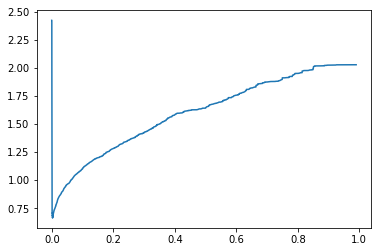

best eta: 0.009561990387737751
max: 2.7487179487179487 99th: 1.2890942306747264 95th: 1.091930537034792 90th: 1.034137348522313 75th: 1.0019660664416314 50th: 1.0 25th: 1.0 mean: 1.015878174625489
average time: 0.47318575382232664 ms/query
turn_to_precise 6482


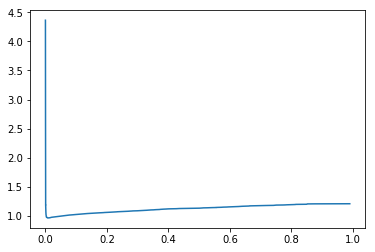

best eta: 0.000587957794778049
max: 82.0 99th: 22.015000000000327 95th: 3.300151515151513 90th: 1.9421052631578948 75th: 1.1344573574110495 50th: 1.0023616076912096 25th: 1.0 mean: 1.712415265419998
average time: 0.07942080497741699 ms/query
turn_to_precise 3863


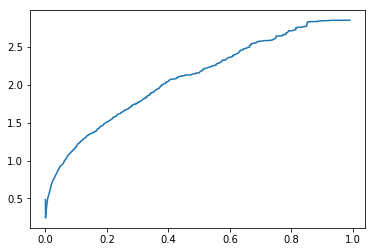

In [6]:
drawing('census13','original',0.5)
drawing('census13','original',0.1)
drawing('census13','original',0.9)

best eta: 4.498226917348802e-05
max: 243.0 99th: 60.01000000000022 95th: 19.333333333333332 90th: 4.2423040982512354 75th: 1.3920882238543024 50th: 1.0306780189959062 25th: 1.002040140892894 mean: 4.015093316954523
average time: 0.9957735300064087 ms/query
turn_to_precise 1602


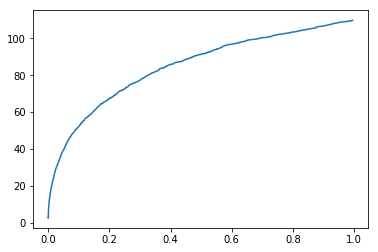

best eta: 0.0003291470347903669
max: 243.0 99th: 2.7901199621011457 95th: 1.5346871352042835 90th: 1.2386190782696234 75th: 1.0452964210627467 50th: 1.003070214977236 25th: 1.0 mean: 1.1742577262901546
average time: 9.952914881706239 ms/query
turn_to_precise 3759


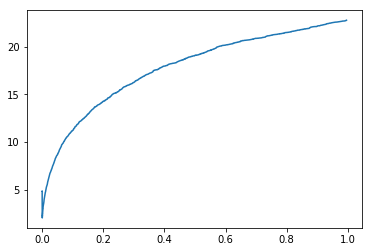

best eta: 1.063768650055863e-06
max: 243.0 99th: 60.01000000000022 95th: 25.0 90th: 14.0 75th: 3.1915317888501002 50th: 1.1392045009832732 25th: 1.010782052775196 mean: 5.42239367658045
average time: 5.769729614257812e-06 ms/query
turn_to_precise 1


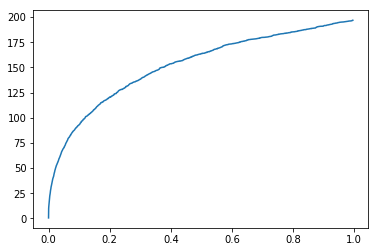

In [7]:
drawing('forest10','original',0.5)
drawing('forest10','original',0.1)
drawing('forest10','original',0.9)

best eta: 0.00016102522204164416
max: 384.0 99th: 2.0558695597642047 95th: 1.1803901280665814 90th: 1.052069750082892 75th: 1.0064259817320536 50th: 1.0010429931137765 25th: 1.0002942437983322 mean: 1.2071935809276801
average time: 0.27812240123748777 ms/query
turn_to_precise 784


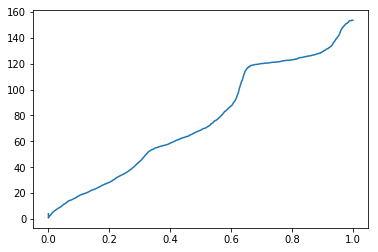

best eta: 0.0002339113416383043
max: 23.26923076923077 99th: 1.715913124120618 95th: 1.140911230813024 90th: 1.0431818368587273 75th: 1.005893736860072 50th: 1.0009934025693072 25th: 1.0002760928711967 mean: 1.0365200878043261
average time: 0.7982613563537597 ms/query
turn_to_precise 876


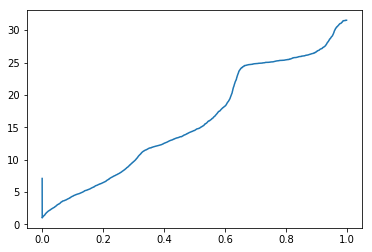

best eta: 0.0001231381029356271
max: 384.0 99th: 5.468988095238112 95th: 1.2845655146852064 90th: 1.0734530675901552 75th: 1.007476429241037 50th: 1.0011304831864138 25th: 1.0003228619233826 mean: 2.4482077546824863
average time: 0.06895346641540527 ms/query
turn_to_precise 627


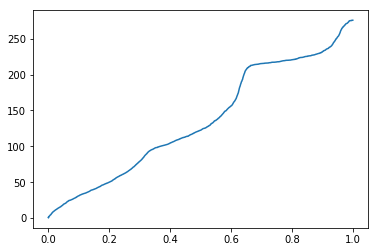

In [8]:
drawing('power7','original',0.5)
drawing('power7','original',0.1)
drawing('power7','original',0.9)

best eta: 0.00017469367594458163
max: 12.654054054054054 99th: 1.7069620658023485 95th: 1.1281745637331848 90th: 1.033345957298089 75th: 1.0035467201461712 50th: 1.000283306564664 25th: 1.0000132473532455 mean: 1.0303874196165088
average time: 0.15652227401733398 ms/query
turn_to_precise 2038


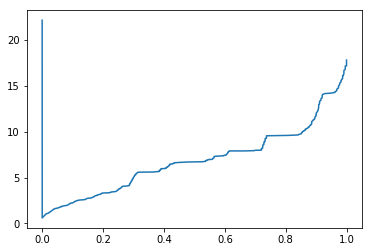

best eta: 0.000680101802572608
max: 1.8000409123453003 99th: 1.1145399701592287 95th: 1.0263987616507164 90th: 1.0095865535260382 75th: 1.001745339833291 50th: 1.0001356810364053 25th: 1.0 mean: 1.0058529199782618
average time: 0.21484310626983644 ms/query
turn_to_precise 2727


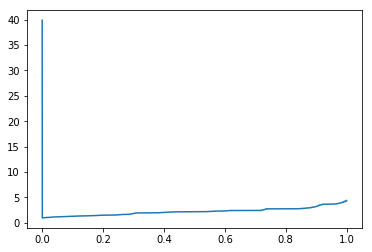

best eta: 0.00012729440641123801
max: 12.654054054054054 99th: 2.075333793178503 95th: 1.215374316836974 90th: 1.0498581638296849 75th: 1.0043584636339078 50th: 1.0003590787989127 25th: 1.000021314215464 mean: 1.046804153393898
average time: 0.14646806716918945 ms/query
turn_to_precise 1849


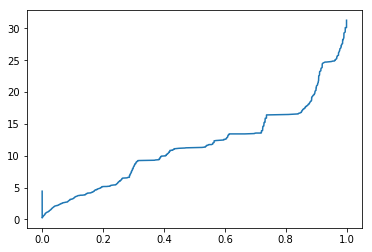

In [9]:
drawing('dmv11','original',0.5)
drawing('dmv11','original',0.1)
drawing('dmv11','original',0.9)